## Anggota Kelompok 2
 



## 1.Dimas Wahyu Saputro
## 2.Fadia Dilla Sabine
## 3.Alfian Dwi Kurnia
## 4.Alfa Khoirin
## 5.Binti Fitrothul Khasa

# Import data jarak antar titik di ITERA

In [37]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df = pd.read_csv('dataFinal.csv', index_col=0) # read the data
df # print the data

,1,2,3,4,5,6,7,8,9,10,11,12
Nama Gedung,,,,,,,,,,,,
1,0.000000,0.212562,0.179391,0.018479,0.168656,0.544826,0.213063,0.335797,0.246667,0.401103,0.455124,0.221815
2,0.212562,0.000000,0.039762,0.205152,0.075938,0.757345,0.425110,0.548052,0.458784,0.613644,0.667683,0.432300
3,0.179391,0.039762,0.000000,0.170212,0.076850,0.722972,0.392444,0.515077,0.426027,0.579937,0.633623,0.396510
4,0.018479,0.205152,0.170212,0.000000,0.167377,0.552772,0.223295,0.345375,0.256673,0.409808,0.463418,0.227217
5,0.168656,0.075938,0.076850,0.167377,0.000000,0.707505,0.373170,0.495626,0.406651,0.562672,0.617370,0.389623
6,0.544826,0.757345,0.722972,0.552772,0.707505,0.000000,0.334346,0.212715,0.300956,0.144993,0.090155,0.328497
7,0.213063,0.425110,0.392444,0.223295,0.373170,0.334346,0.000000,0.122989,0.033683,0.189519,0.244203,0.064284
8,0.335797,0.548052,0.515077,0.345375,0.495626,0.212715,0.122989,0.000000,0.089307,0.067960,0.122790,0.134793
9,0.246667,0.458784,0.426027,0.256673,0.406651,0.300956,0.033683,0.089307,0.000000,0.156032,0.210801,0.070701


## Graf ITERA

In [38]:
# Create a dictionary of the graf
graph = {'1': set(['2', '10']),
         '2': set(['1', '3' ]),
         '3': set(['2', '4']),
         '4': set(['3', '5', '7', '8', '9']),
         '5': set(['4', '6', '9']),
         '6': set(['5', '7', '9']),
         '7': set(['4', '6', '8']),
         '8': set(['4', '7']),
         '9': set(['4', '5', '6', '12']),
         '10': set(['1', '11']),
         '11': set(['10', '12']),
         '12': set(['9', '11']),
         }
         

## Menggambarkan Graf Rute

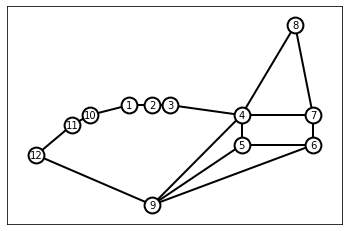

In [39]:
import networkx as nx # graph library
import matplotlib.pyplot as plt # plotting library

G = nx.Graph() # create a graph
G.add_edge(1, 2)
G.add_edge(1, 10)
G.add_edge(10, 11)
G.add_edge(11, 12)
G.add_edge(12, 9)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)
G.add_edge(4, 8)
G.add_edge(4, 7)
G.add_edge(4, 9)
G.add_edge(5, 6)
G.add_edge(5, 9)
G.add_edge(6, 9)
G.add_edge(7, 6)
G.add_edge(7, 8)
G.add_edge(10, 11)

# explicitly set positions
pos = {1: (7.7, 7), 2: (9, 7), 3: (10, 7), 4: (14, 6.5), 5: (14, 5), 
       6: (18, 5), 7: (18, 6.5), 8: (17,11), 9: (9, 2), 10: (5.5, 6.5),
       11: (4.5, 6), 12: (2.5, 4.5)}

options = {
    "font_size": 10,
    "node_size": 250,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 2,
}
nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
plt.show()

## Pencarian rute menggunakan DFS

In [41]:
def dfs(titik, mulai, tujuan):
    que = [[mulai]]
    visited = set()

    while que :
        # Menghitung panjang tumpukan dan memasukan ke variabel panjang_que
        panjang_que = len(que)-1
        # Memasukkan tumpukan paling atas ke rute
        rute = que.pop(panjang_que)
        # Menyimpan node yang dipilih ke variabel state
        state = rute[-1]
        # Cek state apakah ada yanng sama seperti tujuan, jika ada, kita return
        if state == tujuan:
            return rute
        # Jika state tidak sama dengan tujuan, maka cek state tidak ada di visited
        elif state not in visited :
            # Jika state tidak ada divisited maka cek cabang
            for cabang in titik.get(state, []):
                new_rute = list(rute)
                new_rute.append(cabang)
                que.append(new_rute)
            # Tandai state yang sudah dikunjungi sebagai visited
            visited.add(state)
            # Cek isi tumpukan
            isi = len(que)
            if isi == 0:
                print("Tidak Ditemukan")

In [42]:
hasil = dfs(graph,'8','12')
hasil

['8', '4', '5', '6', '9', '12']

## Mendapatkan jarak total rute yang dilalui

In [43]:
def calc_cost(path): # calculate the cost of the path
    temp = 0 # initialize the cost
    for i in range(len(path)-1): # loop through the path
        a = int(path[i])
        b = int(path[i+1])
        temp += df.iat[a-1,b-1]
    return temp # return the cost

calc_cost(hasil) # print the cost of the path

1.591913629

## Ubah dari Nomor ke Nama titik

In [49]:
# dictionary of names
name = {'1': 'Gedung A',
         '2': 'Gedung B',
         '3': 'Galeri',
         '4': 'Asrama 1',
         '5': 'Asrama 4',
         '6': 'Asrama 3',
         '7': 'Asrama 2',
         '8': 'Masjid At-Tanwir',
         '9': 'Gedung E',
         '10': 'Gedung C',
         '11': 'Gedung D',
         '12': 'Masjid Baitul Ilmi'}

def translate_name(path): # translate the path to name
    for i in range(len(hasil)): # loop through the path
        print(f'\n{hasil[i]}-{name[hasil[i]]}') # print the node and the name

print('Rute : ', hasil) # print the path
translate_name(hasil) # print the path and the name

Rute :  ['8', '4', '5', '6', '9', '12']

8-Masjid At-Tanwir

4-Asrama 1

5-Asrama 4

6-Asrama 3

9-Gedung E

12-Masjid Baitul Ilmi
